1 - Distribuição dos níveis do INSE pelo Brasil

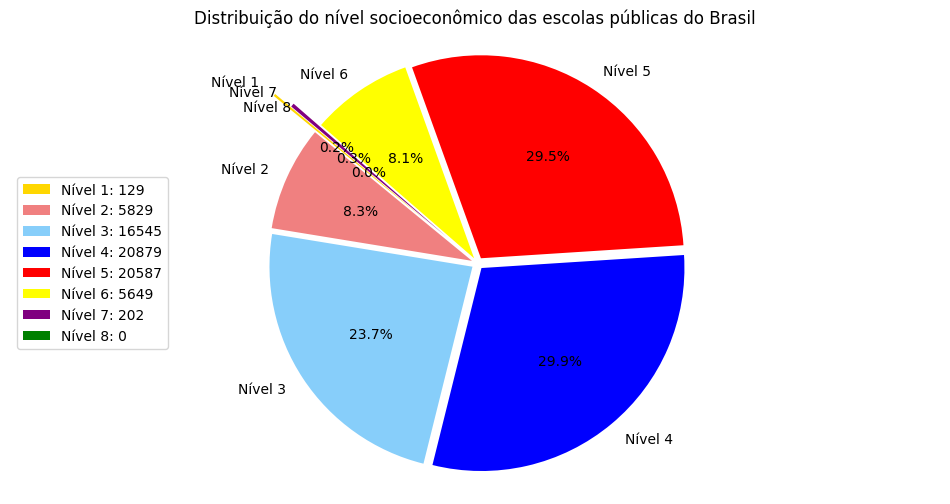

In [51]:
from fpdf import FPDF
import matplotlib.pyplot as plt
import pandas as pd

# Abra o arquivo Excel
df = pd.read_excel('INSE_2021_escolas.xlsx')

# Crie um dicionário para mapear rótulos e cores aos níveis de INSE
inse_labels = {1: 'Nível 1', 2: 'Nível 2', 3: 'Nível 3', 4: 'Nível 4', 5: 'Nível 5', 6: 'Nível 6', 7: 'Nível 7', 8: 'Nível 8'}
inse_colors = {1: 'gold', 2: 'lightcoral', 3: 'lightskyblue', 4: 'blue', 5: 'red', 6: 'yellow', 7: 'purple', 8: 'green'}

# Inicialize um dicionário para contar o total de escolas para cada nível de INSE
total_por_inse = {i: 0 for i in range(1, 9)}

# Preencha o dicionário com contagens
for nivel in range(1, 9):
    total_por_inse[nivel] = len(df[df['INSE_CLASSIFICACAO'] == nivel])

# Crie listas de dados, rótulos e cores para o gráfico de pizza
dados = [total_por_inse[nivel] for nivel in range(1, 9)]
rotulos = [inse_labels[nivel] for nivel in range(1, 9)]
cores = [inse_colors[nivel] for nivel in range(1, 9)]


# Crie o gráfico de pizza
plt.figure(figsize=(12, 6))  # Tamanho do gráfico ajustado
explode = (0.3, 0.03, 0.03, 0.03, 0.03, 0.03, 0.2, 0.1)  # Afasta a primeira fatia (Nível 1)
plt.pie(dados, labels=rotulos, colors=cores, autopct='%1.1f%%', startangle=140, explode=explode)
plt.axis('equal')
plt.title('Distribuição do nível socioeconômico das escolas públicas do Brasil')


# Adicione a legenda ao lado do gráfico
plt.legend(loc='center left', labels=[f'{rotulo}: {dado}' for rotulo, dado in zip(rotulos,dados)])


# Salve o gráfico em um arquivo temporário
plt.savefig('temp_grafico.png', bbox_inches='tight', dpi=150)  # Ajuste do DPI para reduzir o tamanho da imagem

# Crie um PDF com o gráfico e o texto
pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size=12)  # Define a fonte e tamanho do texto

# Adicione o título à primeira página
pdf.set_xy(10, 10)
pdf.cell(0, 10, "Indicador de nível socioeconômico das Escolas de Educação Básica", 0, 1, "C")

# Use o método 'multi_cell' para adicionar o texto ao PDF
pdf.multi_cell(0, 10, txt="""O Inse mensura as condições socioeconômicas dos alunos e permite contextualizar os resultados obtidos por meio dos instrumentos do Sistema de Avaliação da Educação Básica (Saeb).
O indicador pode contribuir para a identificação de desigualdades educacionais e orientar futuros investimentos, visando uma sociedade mais igualitária. As bases para a elaboração do Inse 2019 foram as respostas coletadas no Questionário do Estudante do Saeb 2019. O instrumento foi aplicado aos alunos do 5º e do 9º ano do ensino fundamental, assim como da 3ª e da 4ª série do ensino médio (tradicional e integrado) das escolas que participaram da avaliação. """)

pdf.image('temp_grafico.png', x=50, w=100)  # Ajuste do tamanho da imagem
pdf.output('relatorio_INSE.pdf')

# Remova o arquivo temporário do gráfico
import os
os.remove('temp_grafico.png')



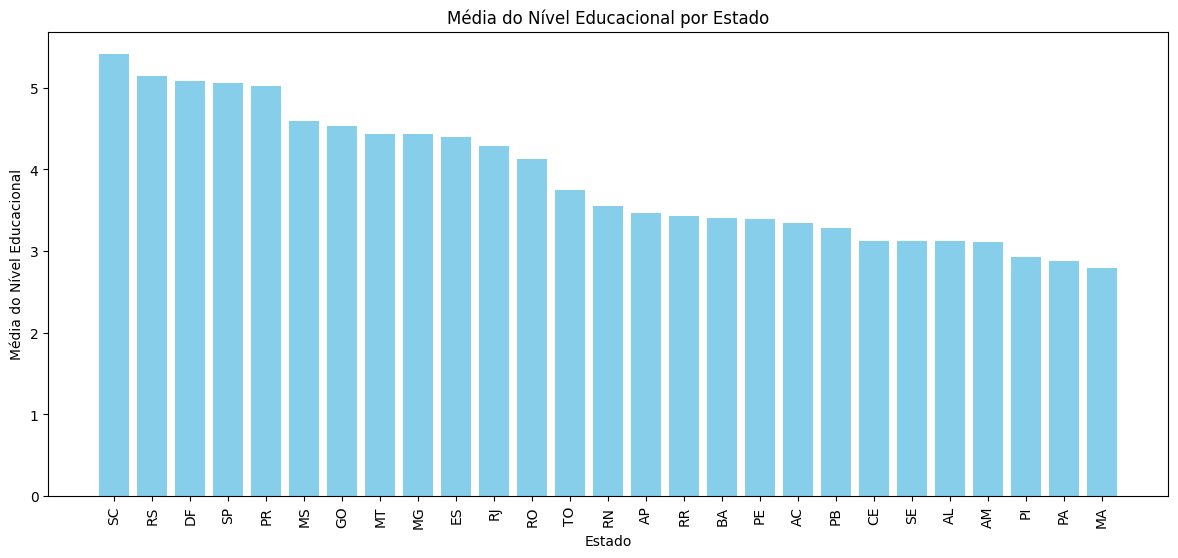

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from fpdf import FPDF

# Carregue a planilha
df = pd.read_excel('INSE_2021_escolas.xlsx')

# Agrupe os dados por estado e calcule a média do nível educacional
media_por_estado = df.groupby('SG_UF')['INSE_CLASSIFICACAO'].mean().reset_index()

# Ordene os dados pela média em ordem decrescente
media_por_estado = media_por_estado.sort_values(by='INSE_CLASSIFICACAO', ascending=False)

# Aumente o tamanho da figura
plt.figure(figsize=(14, 8))

# Crie o gráfico de barras verticais
plt.bar(media_por_estado['SG_UF'], media_por_estado['INSE_CLASSIFICACAO'], color='skyblue')
plt.xlabel('Estado')
plt.ylabel('Média do Nível Educacional')
plt.title('Média do Nível Educacional por Estado')

# Rotacione os rótulos do eixo X para melhor legibilidade
plt.xticks(rotation=90)

# Ajuste os parâmetros de margem para centralizar o gráfico
plt.subplots_adjust(left=0.1, bottom=0.3)


# Salve o gráfico em um arquivo temporário
plt.savefig('temp_grafico.png', bbox_inches='tight', dpi=80)  # Ajuste do DPI para reduzir o tamanho da imagem

# Crie um PDF com o gráfico e o texto
pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size=12)  # Define a fonte e tamanho do texto

# Adicione o título à primeira página
pdf.set_xy(10, 10)
pdf.cell(0, 10, "Média do INSE por estado do Brasil", 0, 1, "C")

# Use o método 'multi_cell' para adicionar o texto ao PDF
pdf.multi_cell(0, 10, txt="""O INSE (Indicador de Nível Socioeconômico) é uma medida que avalia o nível socioeconômico das escolas com base em diferentes indicadores. Este gráfico apresenta a média do INSE por estado do Brasil.""")

# Adicione a imagem do gráfico centralizada
pdf.image('temp_grafico.png', x=30, w=150)  # Ajuste do tamanho e posição da imagem

# Salve o PDF
pdf.output('relatorio_media_INSE_por_estado.pdf')

# Remova o arquivo temporário do gráfico
import os
os.remove('temp_grafico.png')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from fpdf import FPDF


# Carregue a planilha
df = pd.read_excel('divulgacao_anos_finais_escolas_2021.xlsx')

# Filtrar os dados para incluir apenas Rondônia
df_acre = df[df['SG_UF'] == 'AC']
df_alagoas = df[df['SG_UF'] == 'AL']
df_amapa = df[df['SG_UF'] == 'AP']
df_amazonas = df[df['SG_UF'] == 'AM']
df_bahia = df[df['SG_UF'] == 'BA']
df_ceara = df[df['SG_UF'] == 'CE']
df_distrito = df[df['SG_UF'] == 'DF']
df_espirito = df[df['SG_UF'] == 'ES']
df_goias = df[df['SG_UF'] == 'GO']
df_maranhao = df[df['SG_UF'] == 'MA']
df_matog = df[df['SG_UF'] == 'MT']
df_matogs = df[df['SG_UF'] == 'MS']
df_minas = df[df['SG_UF'] == 'MG']
df_para = df[df['SG_UF'] == 'PA']
df_paraiba = df[df['SG_UF'] == 'PB']
df_parana = df[df['SG_UF'] == 'PR']
df_pernambuco = df[df['SG_UF'] == 'PE']
df_piaui = df[df['SG_UF'] == 'PI']
df_rio = df[df['SG_UF'] == 'RJ']
df_riogn = df[df['SG_UF'] == 'RN']
df_riogs = df[df['SG_UF'] == 'RS']
df_rondonia = df[df['SG_UF'] == 'RO']
df_roraima = df[df['SG_UF'] == 'RR']
df_santa = df[df['SG_UF'] == 'SC']
df_sao = df[df['SG_UF'] == 'SP']
df_sergipe = df[df['SG_UF'] == 'SE']
df_tocantins = df[df['SG_UF'] == 'TO']

df_acre = df_acre[df_acre['IDEB'] != 0]
df_alagoas = df_alagoas[df_alagoas['IDEB'] != 0]
df_amapa = df_amapa[df_amapa['IDEB'] != 0]
df_amazonas = df_amazonas[df_amazonas['IDEB'] != 0]
df_bahia = df_bahia[df_bahia['IDEB'] != 0]
df_ceara = df_ceara[df_ceara['IDEB'] != 0]
df_distrito = df_distrito[df_distrito['IDEB'] != 0]
df_espirito = df_espirito[df_espirito['IDEB'] != 0]
df_goias = df_goias[df_goias['IDEB'] != 0]
df_maranhao = df_maranhao[df_maranhao['IDEB'] != 0]
df_matog = df_matog[df_matog['IDEB'] != 0]
df_matogs = df_matogs[df_matogs['IDEB'] != 0]
df_minas = df_minas[df_minas['IDEB'] != 0]
df_para = df_para[df_para['IDEB'] != 0]
df_paraiba = df_paraiba[df_paraiba['IDEB'] != 0]
df_parana = df_parana[df_parana['IDEB'] != 0]
df_pernambuco = df_pernambuco[df_pernambuco['IDEB'] != 0]
df_piaui = df_piaui[df_piaui['IDEB'] != 0]
df_rio = df_rio[df_rio['IDEB'] != 0]
df_riogn = df_riogn[df_riogn['IDEB'] != 0]
df_riogs = df_riogs[df_riogs['IDEB'] != 0]
df_rondonia = df_rondonia[df_rondonia['IDEB'] != 0]
df_roraima = df_roraima[df_roraima['IDEB'] != 0]
df_santa = df_santa[df_santa['IDEB'] != 0]
df_sao = df_sao[df_sao['IDEB'] != 0]
df_sergipe = df_sergipe[df_sergipe['IDEB'] != 0]
df_tocantins = df_tocantins[df_tocantins['IDEB'] != 0]


# Calcular a média do nível educacional
media_acre = df_acre['IDEB'].mean()
media_alagoas = df_alagoas['IDEB'].mean()
media_amapa = df_amapa['IDEB'].mean()
media_amazonas = df_amazonas['IDEB'].mean()
media_bahia = df_bahia['IDEB'].mean()
media_ceara = df_ceara['IDEB'].mean()
media_distrito = df_distrito['IDEB'].mean()
media_espirito = df_espirito['IDEB'].mean()
media_goias = df_goias['IDEB'].mean()
media_maranhao = df_maranhao['IDEB'].mean()
media_matog = df_matog['IDEB'].mean()
media_matogs = df_matogs['IDEB'].mean()
media_minas = df_minas['IDEB'].mean()
media_para = df_para['IDEB'].mean()
media_paraiba = df_paraiba['IDEB'].mean()
media_parana = df_parana['IDEB'].mean()
media_pernambuco = df_pernambuco['IDEB'].mean()
media_piaui = df_piaui['IDEB'].mean()
media_rio = df_rio['IDEB'].mean()
media_riogn = df_riogn['IDEB'].mean()
media_riogs = df_riogs['IDEB'].mean()
media_rondonia = df_rondonia['IDEB'].mean()
media_roraima = df_roraima['IDEB'].mean()
media_santa = df_santa['IDEB'].mean()
media_sao = df_sao['IDEB'].mean()
media_sergipe = df_sergipe['IDEB'].mean()
media_tocantins = df_tocantins['IDEB'].mean()

# Lista de estados
estados = ['Acre', 'Alagoas', 'Amapá', 'Amazonas', 'Bahia', 'Ceará', 'Distrito Federal', 'Espírito Santo', 'Goiás', 'Maranhão', 'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Pará', 'Paraíba', 'Paraná', 'Pernambuco', 'Piauí', 'Rio de Janeiro', 'Rio Grande do Norte', 'Rio Grande do Sul', 'Rondônia', 'Roraima', 'Santa Catarina', 'São Paulo', 'Sergipe', 'Tocantins']

# Lista das médias dos estados
medias = [media_acre, media_alagoas, media_amapa, media_amazonas, media_bahia, media_ceara, media_distrito, media_espirito, media_goias, media_maranhao, media_matog, media_matogs, media_minas, media_para, media_paraiba, media_parana, media_pernambuco, media_piaui, media_rio, media_riogn, media_riogs, media_rondonia, media_roraima, media_santa, media_sao, media_sergipe, media_tocantins]






Relatório final gerado com sucesso: relatorio_final.pdf


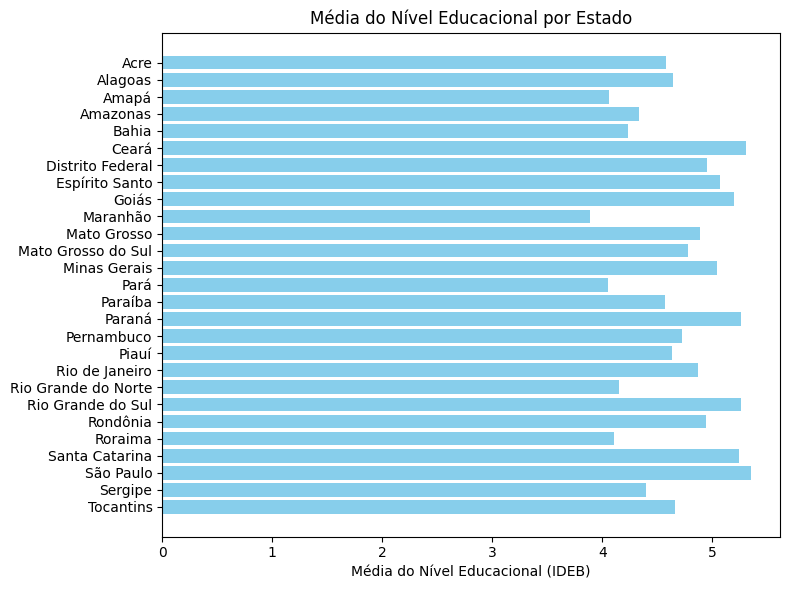

In [3]:
from fpdf import FPDF
import matplotlib.pyplot as plt

# Lista de estados e médias (mantenha-as na mesma ordem)
estados = ['Acre', 'Alagoas', 'Amapá', 'Amazonas', 'Bahia', 'Ceará', 'Distrito Federal', 'Espírito Santo', 'Goiás', 'Maranhão', 'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Pará', 'Paraíba', 'Paraná', 'Pernambuco', 'Piauí', 'Rio de Janeiro', 'Rio Grande do Norte', 'Rio Grande do Sul', 'Rondônia', 'Roraima', 'Santa Catarina', 'São Paulo', 'Sergipe', 'Tocantins']
medias = [media_acre, media_alagoas, media_amapa, media_amazonas, media_bahia, media_ceara, media_distrito, media_espirito, media_goias, media_maranhao, media_matog, media_matogs, media_minas, media_para, media_paraiba, media_parana, media_pernambuco, media_piaui, media_rio, media_riogn, media_riogs, media_rondonia, media_roraima, media_santa, media_sao, media_sergipe, media_tocantins]

# Texto para adicionar antes do gráfico
texto = """
O Índice de Desenvolvimento da Educação Básica (Ideb) foi criado em 2007 e reúne, em um só indicador, os resultados de dois conceitos igualmente importantes para a qualidade da educação: o fluxo escolar e as médias de desempenho nas avaliações. O Ideb é calculado a partir dos dados sobre aprovação escolar, obtidos no Censo Escolar, e das médias de desempenho no Sistema de Avaliação da Educação Básica (Saeb).
"""

# Nome do arquivo de saída
output_filename = 'relatorio_final.pdf'

class PDF(FPDF):
    def header(self):
        # Título do cabeçalho
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'Índice de Desenvolvimento da Educação Básica (Ideb)', 0, 1, 'C')
    
    def footer(self):
        # Número de página no rodapé
        self.set_y(-15)
        self.set_font('Arial', 'I', 8)
        self.cell(0, 10, f'Página {self.page_no()}', 0, 0, 'C')

pdf = PDF()
pdf.add_page()
pdf.set_font('Arial', '', 12)
pdf.multi_cell(0, 10, texto)
pdf.image('grafico_estados.png', x=10, w=190)
pdf.ln(100)

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
plt.barh(estados, medias, color='skyblue')
plt.xlabel('Média do Nível Educacional (IDEB)')
plt.title('Média do Nível Educacional por Estado')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('grafico_estados.png', format='png', dpi=300)

pdf.output(output_filename)
print(f"Relatório final gerado com sucesso: {output_filename}")
